In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("26-customer_data.csv")

**Scenario:** A retail company wants to analyze the annual income of customers enrolled in its loyalty program and the Spending Score data generated based on the frequency and amount of purchases they make in the store. The goal is to identify customer groups with similar income and spending habits and develop marketing strategies specific to each segment.

In [3]:
df.head()

,Annual_Income,Spending_Score
0,-5.772478,-4.818216
1,6.768246,-5.424570
2,5.796159,-6.239967
3,7.096022,-5.272612
4,-5.725561,-9.316889


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Annual_Income   1499 non-null   float64
 1   Spending_Score  1499 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


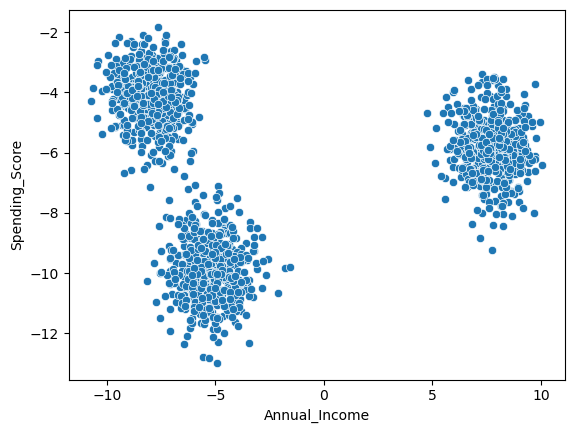

In [5]:
sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score")
plt.show()

In [6]:
# since we do not have a dependent feature here, we won't be using y
# we can train the whole model with df, or just train-test split it to test our model
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.3, random_state=15)

In [7]:
X_train

,Annual_Income,Spending_Score
482,-7.486110,-3.583399
235,-7.552626,-4.381446
419,-4.462203,-9.309096
1068,-3.995774,-7.509662
369,-4.208993,-10.680397
...,...,...
667,-6.734875,-5.107626
156,-8.236823,-3.127431
384,-7.744180,-3.563590
645,-6.151325,-9.263209


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
from sklearn.cluster import KMeans

In [10]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11): #try k numbers from 1 to 11
    kmeans=KMeans(n_clusters=k,init="k-means++") 
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[2097.9999999999995,
 1214.2207406840694,
 165.804333694918,
 136.14873261649944,
 104.06206107905263,
 75.85758589439973,
 66.96994858576447,
 56.85237513864428,
 48.623379591459575,
 45.837844738491754]

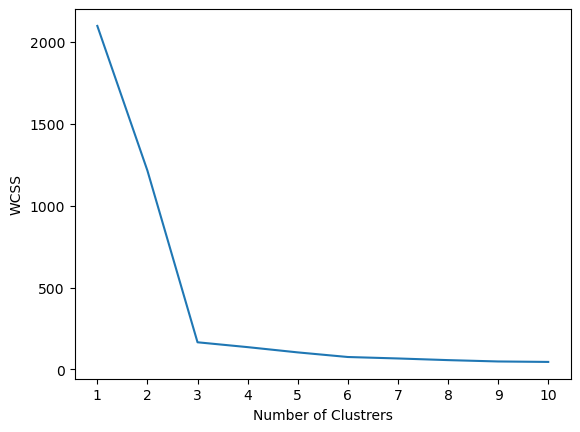

In [12]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [14]:
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [15]:
y_pred=kmeans.predict(X_test_scaled)

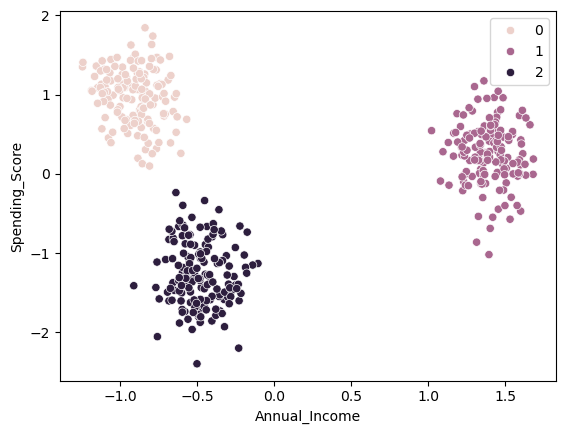

In [16]:
sns.scatterplot(data=pd.DataFrame(X_test_scaled, columns=X_test.columns), x="Annual_Income", y="Spending_Score", hue=y_pred)
plt.show()

In [17]:
## Alternative ways to validate the k value
## kneelocator

In [18]:
!pip install kneed

In [19]:
from kneed import KneeLocator

In [20]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing") #make sure you specify convex or concave in curve

In [21]:
kl.elbow

3

In [22]:
# Other alternative
# silhoutte score
from sklearn.metrics import silhouette_score

In [23]:
silhouette_coefficients=[]
for k in range(2,11): # it needs at least 2 cluster labels so we are not trying 1
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_) 
    silhouette_coefficients.append(score)

In [24]:
silhouette_coefficients

[0.5160603187357252,
 0.7808078579073072,
 0.658064088665537,
 0.6274050491719647,
 0.44065820043187437,
 0.43590031157259934,
 0.40654812727230466,
 0.39992881397935776,
 0.3793826822758821]

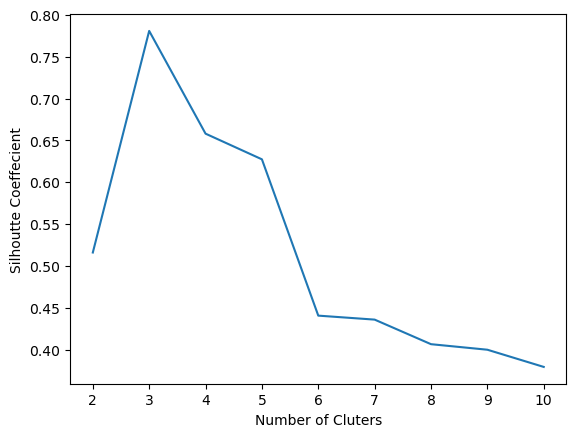

In [25]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()